# Import Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import sys
import time
import scipy.stats
import os.path
from importlib import reload

# Set file paths and names
file1_path = 'D:/FERMI 2017 2/Binned/'
file1_name = 'XAS_014_014_bin.h5'
file2_path = 'D:/FERMI 2017 2/Binned/'
file2_name = 'XAS_000_000_bin.h5'

# Check that data file exists
if not os.path.exists(file1_path+file1_name) :
    raise NameError('File 1 does not exist. Check file path and/or name.')
if not os.path.exists(file2_path+file2_name) :
    raise NameError('File 2 does not exist. Check file path and/or name.')

###################
### Import Data ###
###################
Success = True
# Import File 1
fh5 = h5py.File(file1_path+file1_name, 'r')
# XAS matrix
if '/BinnedData/XAS_2dmatrix' in fh5 :
    Success = True
    xasmatrix1 = fh5['/BinnedData/XAS_2dmatrix'].value
else :
    print('XAS data matrix missing')
    Success = False
# FEL energy
if '/BinnedData/E_bin_centers' in fh5 :
    Success = True
    felenergy1 = fh5['/BinnedData/E_bin_centers'].value
else :
    print('FEL energy data missing')
    Success = False
# Delay
if '/BinnedData/delays_fs' in fh5 :
    Success = True
    delay1 = fh5['/BinnedData/delays_fs'].value
    delay1 = delay1*1e-3
else :
    print('Delay data missing')
    Success = False
fh5.close()

# Import File 2
fh5 = h5py.File(file2_path+file2_name, 'r')
# XAS matrix
if '/BinnedData/XAS_2dmatrix' in fh5 :
    Success = True
    xasmatrix2 = fh5['/BinnedData/XAS_2dmatrix'].value
else :
    print('XAS data matrix missing')
    Success = False
# FEL energy
if '/BinnedData/E_bin_centers' in fh5 :
    Success = True
    felenergy2 = fh5['/BinnedData/E_bin_centers'].value
else :
    print('FEL energy data missing')
    Success = False
# Delay
if '/BinnedData/delays_fs' in fh5 :
    Success = True
    delay2 = fh5['/BinnedData/delays_fs'].value
    delay2 = delay2*1e-3
else :
    print('Delay data missing')
    Success = False
fh5.close()

if not Success :
    raise ImportError('Data analysis cancelled due to missing data')

# Data Comparison
Compare negative delays

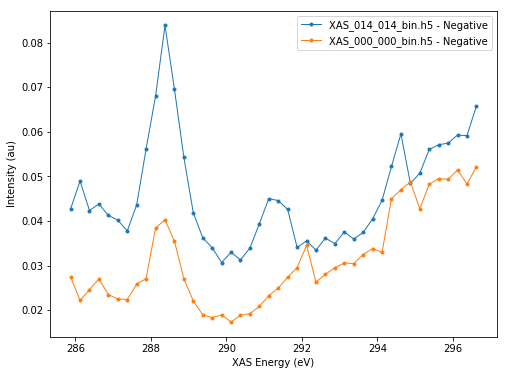

In [6]:
index1 = list()
i = 0
while i < len(delay1) :
    if delay1[i] <= 0 :
        index1.append(i)
    i+= 1
index2 = list()
i = 0
while i < len(delay2) :
    if delay2[i] <= 0 :
        index2.append(i)
    i+= 1
data_delay1_negative = np.zeros(len(xasmatrix1[0]))
i = 0
while i < len(index1) :
    data_delay1_negative = data_delay1_negative + xasmatrix1[index1[i]]
    i+= 1
data_delay1_negative = data_delay1_negative / len(index1)
data_delay2_negative = np.zeros(len(xasmatrix2[0]))
i = 0
while i < len(index2) :
    data_delay2_negative = data_delay2_negative + xasmatrix2[index2[i]]
    i+= 1
data_delay2_negative = data_delay2_negative / len(index2)
plt.figure(figsize = [8,6])
plt.plot(felenergy1, data_delay1_negative,'-o', ms=3, lw=1,label=file1_name+' - Negative')
plt.plot(felenergy2, data_delay2_negative,'-o', ms=3, lw=1,label=file2_name+' - Negative')
plt.xlabel('XAS Energy (eV)')
plt.ylabel('Intensity (au)')
plt.legend()
print('')

compare positive delays

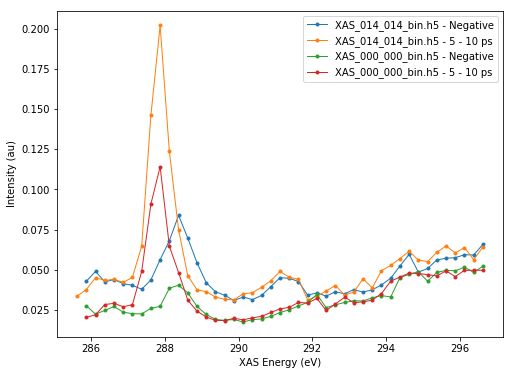

In [7]:
delay_min = 5
delay_max = 10
index1 = list()
i = 0
while i < len(delay1) :
    if delay1[i] >= delay_min and delay1[i] <= delay_max :
        index1.append(i)
    i+= 1
index2 = list()
i = 0
while i < len(delay2) :
    if delay2[i] >= delay_min and delay2[i] <= delay_max :
        index2.append(i)
    i+= 1
data_delay1_positive = np.zeros(len(xasmatrix1[0]))
i = 0
while i < len(index1) :
    data_delay1_positive = data_delay1_positive + xasmatrix1[index1[i]]
    i+= 1
data_delay1_positive = data_delay1_positive / len(index1)
data_delay2_positive = np.zeros(len(xasmatrix2[0]))
i = 0
while i < len(index2) :
    data_delay2_positive = data_delay2_positive + xasmatrix2[index2[i]]
    i+= 1
data_delay2_positive = data_delay2_positive / len(index2)
plt.figure(figsize = [8,6])
plt.plot(felenergy1, data_delay1_negative,'-o', ms=3, lw=1,label=file1_name+' - Negative')
plt.plot(felenergy1, data_delay1_positive,'-o', ms=3, lw=1,label=file1_name+' - '+str(delay_min)+' - '+str(delay_max)+' ps')
plt.plot(felenergy2, data_delay2_negative,'-o', ms=3, lw=1,label=file2_name+' - Negative')
plt.plot(felenergy2, data_delay2_positive,'-o', ms=3, lw=1,label=file2_name+' - '+str(delay_min)+' - '+str(delay_max)+' ps')
plt.xlabel('XAS Energy (eV)')
plt.ylabel('Intensity (au)')
plt.legend()
print('')